In [1]:
import sys
import os

import numpy as np
from matplotlib import pyplot as plt
from scipy.special import linestyle

sys.path.append(os.path.abspath(".."))

import importlib
import pandas as pd

import volpy_func_lib as vp
import load_clean_lib
import table_lib
import vol_strat_lib as vs
import volpy_func_ticker_lib as vtp

importlib.reload(vp)
importlib.reload(load_clean_lib)
importlib.reload(table_lib)
importlib.reload(vs)
importlib.reload(vtp)

os.makedirs("figures/Linear vs CA Robustness analysis", exist_ok=True)

In [2]:
sum_df = vtp.concat_ticker_datasets(vp.All_tickers, df_name="sum1")

Skipped 2/237 tickers: ['RUT', 'INDU']


In [10]:
sum_df.loc[sum_df["high days"] == 21, "theta_CW"] = 1
sum_df.loc[sum_df["high days"] == 21, "theta_linear"] = 1

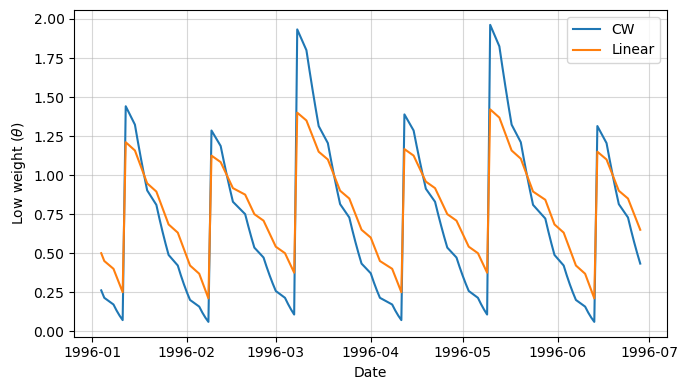

In [11]:
df = sum_df[sum_df["ticker"]=="SPX"]
df = df[df["date"] <= "1996-06-30"]

plt.figure(figsize=(7,4))
plt.plot(df["date"], df["theta_CW"], label = "CW")
plt.plot(df["date"], df["theta_linear"], label = "Linear")
plt.xlabel("Date")
plt.ylabel(r"Low weight ($\theta$)")
plt.legend()
plt.tight_layout()
plt.grid(alpha=0.5)
plt.savefig("figures/Linear vs CA Robustness analysis/theta_SPX.pdf")
plt.show()


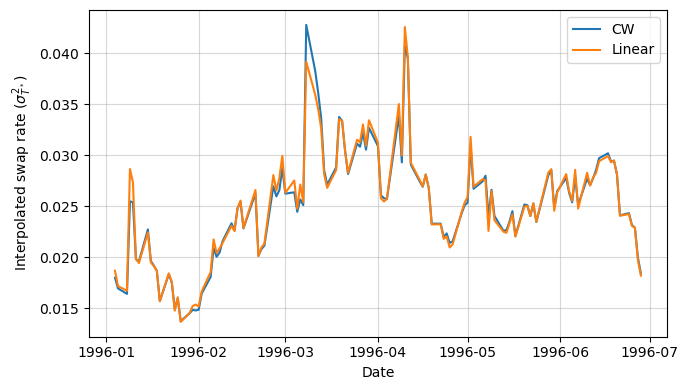

In [12]:
df = sum_df[sum_df["ticker"]=="SPX"]
df = df[df["date"] <= "1996-06-30"]

plt.figure(figsize=(7,4))
plt.plot(df["date"], df["SW_0_30"], label = "CW")
plt.plot(df["date"], df["SW_0_30_linear"], label = "Linear")
plt.xlabel("Date")
plt.ylabel(r"Interpolated swap rate ($\sigma^2_{T^*})$")
plt.legend()
plt.tight_layout()

plt.grid(alpha=0.5)
plt.savefig("figures/Linear vs CA Robustness analysis/SW_SPX.pdf")
plt.show()


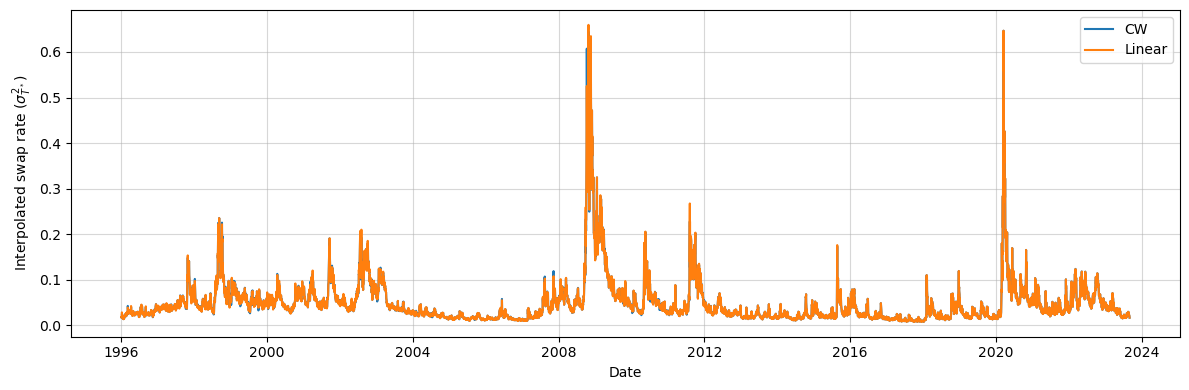

In [13]:
df = sum_df[sum_df["ticker"]=="SPX"]
# df = df[df["date"] <= "1996-06-30"]

plt.figure(figsize=(12,4))
plt.plot(df["date"], df["SW_0_30"], label = "CW")
plt.plot(df["date"], df["SW_0_30_linear"], label = "Linear")
plt.xlabel("Date")
plt.ylabel(r"Interpolated swap rate ($\sigma^2_{T^*})$")
plt.legend()
plt.tight_layout()

plt.grid(alpha=0.5)
plt.savefig("figures/Linear vs CA Robustness analysis/SW_full_SPX.pdf")
plt.show()

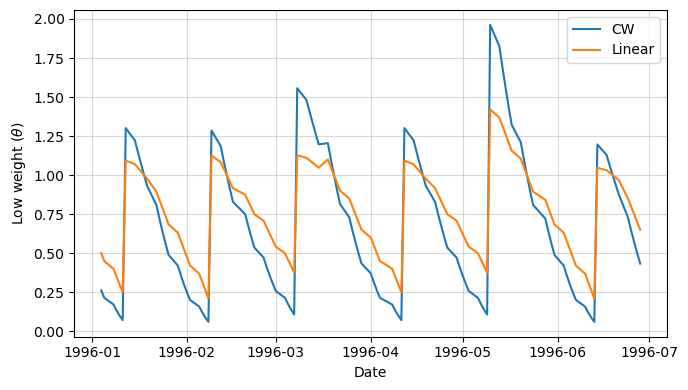

In [14]:
df = sum_df[sum_df["ticker"]=="IBM"]
df = df[df["date"] <= "1996-06-30"]

plt.figure(figsize=(7,4))
plt.plot(df["date"], df["theta_CW"], label = "CW")
plt.plot(df["date"], df["theta_linear"], label = "Linear")
plt.xlabel("Date")
plt.ylabel(r"Low weight ($\theta$)")
plt.legend()
plt.tight_layout()

plt.grid(alpha=0.5)
plt.savefig("figures/Linear vs CA Robustness analysis/theta_IBM.pdf")
plt.show()


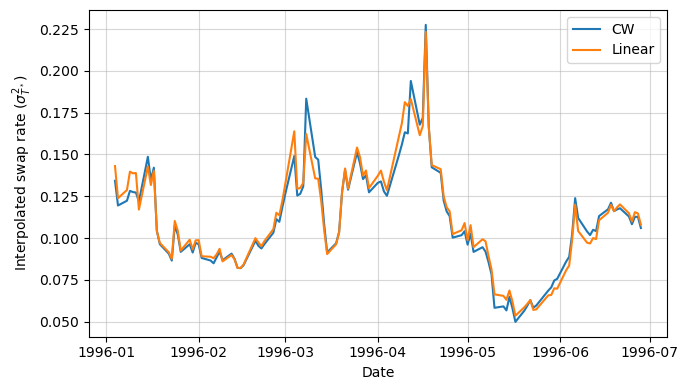

In [15]:
df = sum_df[sum_df["ticker"]=="IBM"]
df = df[df["date"] <= "1996-06-30"]

plt.figure(figsize=(7,4))
plt.plot(df["date"], df["SW_0_30"], label = "CW")
plt.plot(df["date"], df["SW_0_30_linear"], label = "Linear")
plt.xlabel("Date")
plt.ylabel(r"Interpolated swap rate ($\sigma^2_{T^*})$")
plt.legend()
plt.tight_layout()

plt.grid(alpha=0.5)
plt.savefig("figures/Linear vs CA Robustness analysis/SW_IBM.pdf")
plt.show()


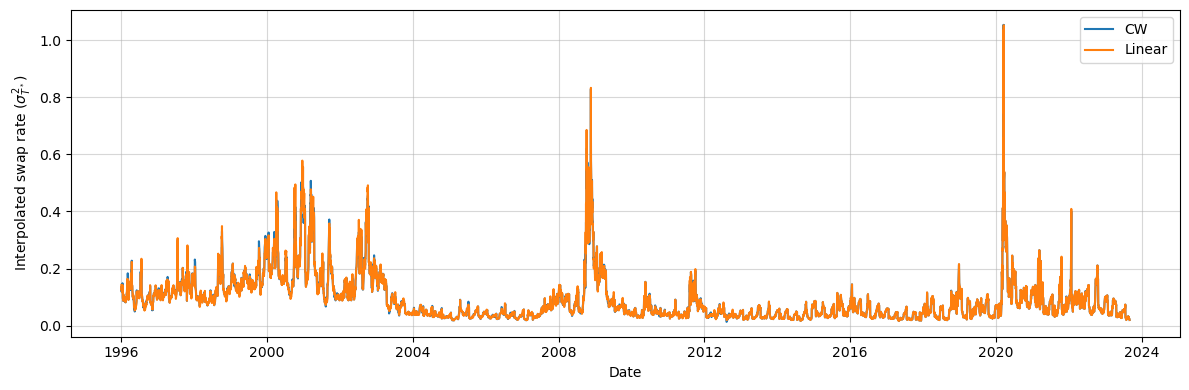

In [16]:
df = sum_df[sum_df["ticker"]=="IBM"]
# df = df[df["date"] <= "1996-06-30"]

plt.figure(figsize=(12,4))
plt.plot(df["date"], df["SW_0_30"], label = "CW")
plt.plot(df["date"], df["SW_0_30_linear"], label = "Linear")
plt.xlabel("Date")
plt.ylabel(r"Interpolated swap rate ($\sigma^2_{T^*})$")
plt.tight_layout()

plt.legend()
plt.grid(alpha=0.5)
plt.savefig("figures/Linear vs CA Robustness analysis/SW_full_IBM.pdf")
plt.show()

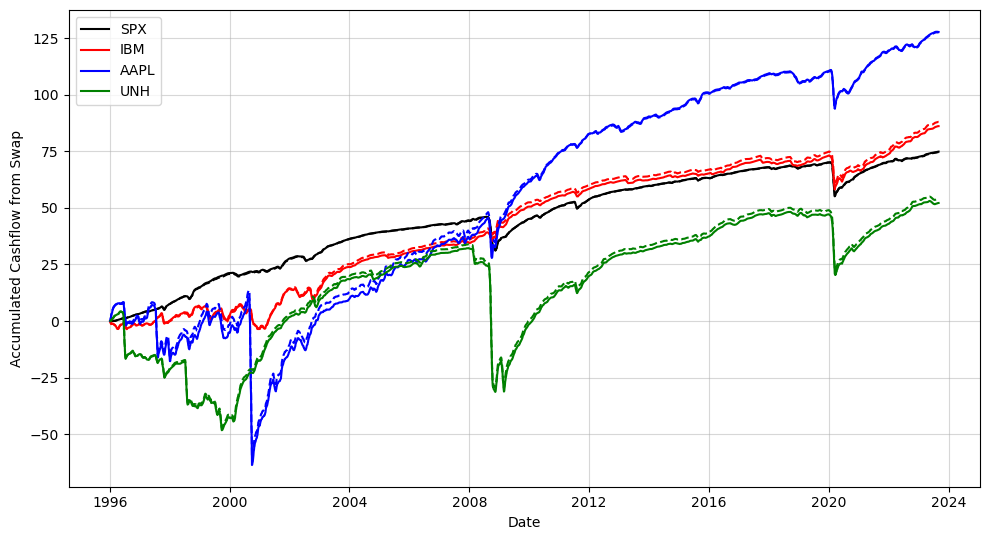

In [70]:
df = sum_df[sum_df["ticker"]=="SPX"]
# df = df[df["date"] <= "1996-06-30"]

plt.figure(figsize=(10,5.5))
plt.plot(df["date"], -np.cumsum(df["RV"] - df["SW_0_30"]), label = "SPX", color = "black")
plt.plot(df["date"], -np.cumsum(df["RV"] - df["SW_0_30_linear"]), linestyle = "--", color = "black") # , label = "Linear (SPX)"

df = sum_df[sum_df["ticker"]=="IBM"]
plt.plot(df["date"], -np.cumsum(df["RV"] - df["SW_0_30"]), label = "IBM", color = "red")
plt.plot(df["date"], -np.cumsum(df["RV"] - df["SW_0_30_linear"]), linestyle = "--", color = "red") #, label = "Linear (IBM)"

df = sum_df[sum_df["ticker"]=="AAPL"]
plt.plot(df["date"], -np.cumsum(df["RV"] - df["SW_0_30"]), label = "AAPL", color = "blue")
plt.plot(df["date"], -np.cumsum(df["RV"] - df["SW_0_30_linear"]), linestyle = "--", color = "blue") #, label = "Linear (UNH)"

df = sum_df[sum_df["ticker"]=="UNH"]
plt.plot(df["date"], -np.cumsum(df["RV"] - df["SW_0_30"]), label = "UNH", color = "green")
plt.plot(df["date"], -np.cumsum(df["RV"] - df["SW_0_30_linear"]), linestyle = "--", color = "green") #, label = "Linear (UNH)"


plt.xlabel("Date")
plt.ylabel(r"Accumulated Cashflow from Swap")
plt.legend()
plt.tight_layout()

plt.grid(alpha=0.5)
plt.savefig("figures/Linear vs CA Robustness analysis/Cashflow_mly_SW_SPX_IBM_AAPL_UNH.pdf")
plt.show()

In [62]:
sum_df = vtp.concat_ticker_datasets(vp.Liquid_tickers, df_name="sum1")

In [63]:
np.mean(sum_df["SW_0_30"] > sum_df["SW_0_30_linear"])

0.44503243427791056

In [64]:
mean_diff = (sum_df["SW_0_30"] - sum_df["SW_0_30_linear"]) \
              .groupby(sum_df["ticker"]) \
              .mean()

# count how many tickers have a positive mean difference
positive_count = (mean_diff > 0).sum()

# fraction of tickers with positive mean difference
positive_fraction = (mean_diff > 0).mean()

print(f"{positive_count} tickers, i.e. {positive_fraction:.2%}, have a positive average SW_0_30 − SW_0_30_linear")

13 tickers, i.e. 26.00%, have a positive average SW_0_30 − SW_0_30_linear


In [65]:
sum_df["SW_0_30"].mean()

0.1539705230409527

In [66]:
sum_df["SW_0_30_linear"].mean()

0.15421987205356807

In [84]:
SPX_df[["theta_CW", "theta_linear"]].corr()

,theta_CW,theta_linear
theta_CW,1.00000,0.97289
theta_linear,0.97289,1.00000


In [88]:
df = sum_df[sum_df["ticker"]=="SPX"]
df[["SW_0_30", "SW_0_30_linear"]].corr()

,SW_0_30,SW_0_30_linear
SW_0_30,1.000000,0.998599
SW_0_30_linear,0.998599,1.000000


In [89]:
df = sum_df[sum_df["ticker"]=="UNH"]
df[["SW_0_30", "SW_0_30_linear"]].corr()

,SW_0_30,SW_0_30_linear
SW_0_30,1.000000,0.998516
SW_0_30_linear,0.998516,1.000000


In [87]:
sum_df[["SW_0_30", "SW_0_30_linear"]].corr()

,SW_0_30,SW_0_30_linear
SW_0_30,1.000000,0.998687
SW_0_30_linear,0.998687,1.000000


In [85]:
sum_df[["theta_CW", "theta_linear"]].corr()

,theta_CW,theta_linear
theta_CW,1.000000,0.888334
theta_linear,0.888334,1.000000


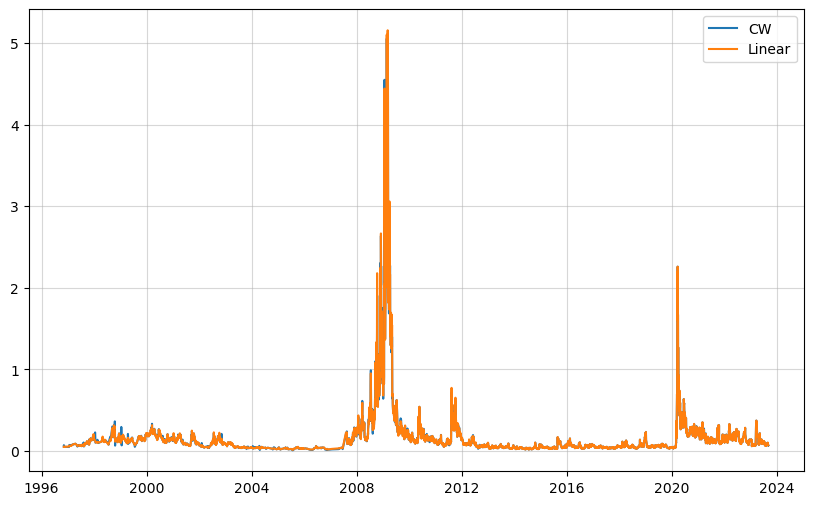

In [48]:
SPX_df = sum_df[sum_df["ticker"]=="WFC"]
df = SPX_df

plt.figure(figsize=(10,6))
plt.plot(df["date"], df["SW_0_30"], label = "CW")
plt.plot(df["date"], df["SW_0_30_linear"], label = "Linear")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

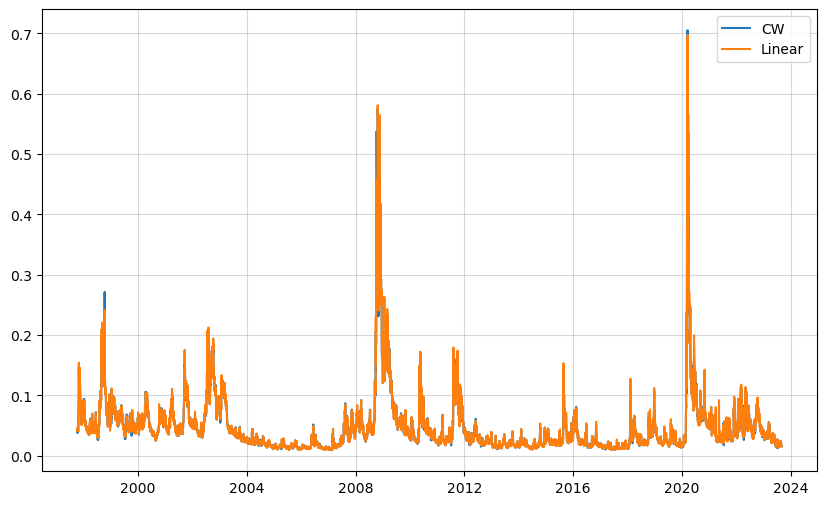

In [56]:
SPX_df = sum_df[sum_df["ticker"]=="DJX"]
df = SPX_df

plt.figure(figsize=(10,6))
plt.plot(df["date"], df["SW_0_30"], label = "CW")
plt.plot(df["date"], df["SW_0_30_linear"], label = "Linear")
plt.legend()
plt.grid(alpha=0.5)
plt.show()